# Text Assemble

It is observed that 70% of data available to any businesses is unstructured. The first step is collating unstructured data from different sources such as open-ended feedback, phone calls, email support, online chat and social media networks like Twitter, LinkedIn and Facebook. Assembling these data and applying mining/machine learning techniques to analyze them provides valuable opportunities for organizations to build more power into customer experience. 
There are several libraries available for extracting text content from different formats discussed above. By far the best library that provides simple and single interface for multiple formats is ‘textract’ (open source MIT license). Note that as of now this library/package is available for Linux, Mac OS and not Windows. Below is a list of supported formats.

### Reading from PDF

In [1]:
import textract

# Extracting from normal pdf
text = textract.process('Data/pdf/raw_text.pdf', language='eng')

# Extrcting from two columned pdf
text = textract.process('Data/pdf/two_column.pdf', language='eng')

# Extracting from scanned text pdf
text = textract.process('Data/pdf/ocr_text.pdf', method='tesseract', language='eng')

### Reading from JPG

In [2]:
# Extracting from jpg
text = textract.process('Data/jpg/raw_text.jpg', method='tesseract', language='eng')
print text

EAS TEST

THIS IS A TEST OF THE NATIONAL
EMERGENCY ALERT SYSTEM

THERE IS NO ACTUAL EMERGENCY




### Extracting from audio file

In [3]:
text = textract.process('Data/wav/raw_text.wav', language='eng')
print "raw_text.wav: ", text

text = textract.process('Data/wav/standardized_text.wav', language='eng')
print "standardized_text.wav: ", text

raw_text.wav:  everything you also

standardized_text.wav:  a quick brown fox jumped over the lazy dog



### Twitter 

Twitter is a online news and social networking service provider and there are 320 million twitter users with an average of 42 million active twitters every day! (as of 2016, source smartinsights). It is a great source to understand what users are talking about a chosen topic.

#### API access token

- Goto https://apps.twitter.com/
- Click on 'Create New App'
- Fill the required information and click on 'Create your Twitter Application'
- You'll get the access details under 'Keys and Access Tokens' tab

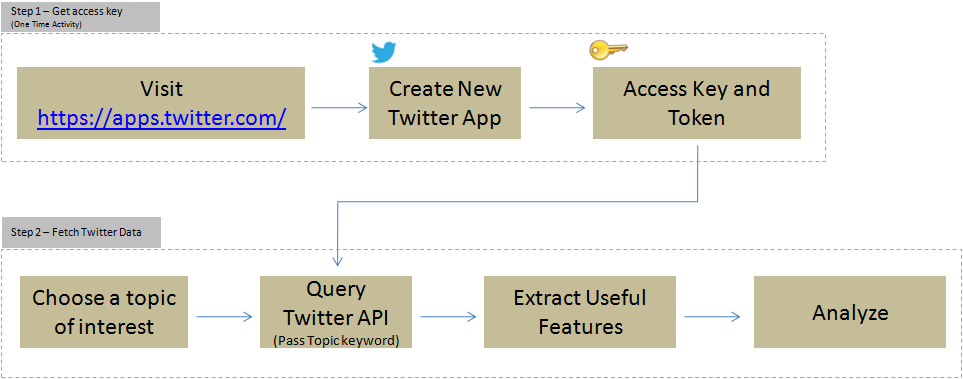

In [1]:
from IPython.display import Image
Image(filename='../Chapter 5 Figures/Fetch_Twitter_Data.png', width=900)

In [2]:
#Import the necessary methods from tweepy library
import tweepy
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

import pandas as pd

In [3]:
#provide your access details below 
access_token = "2345619938-zAlzAbKxL9aUqqqw02gCa6EWQWvoXVRVAVunS64"
access_token_secret = "LitbGHTzI0fmI76UsPWclvjVbKOzTt1G1jZqMwKu4CCW2"
consumer_key = "s3tHRlMAgThjVgscqJKL2o2vE"
consumer_secret = "1LTEr2CZtFXVzToOMx9ISd41F5PiAZSOzDHdspTyjnQlqjAQwJ"

# establish a connection
auth = tweepy.auth.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

Let's assume that you would like to understand what is being talking about the iPhone 7 and its camera feature. So let's pull the recent 10 posts.

Note: You can pull historic user posts about a topic for a max of 10 to 15 days only depending on the volume of the posts.

In [4]:
#fetch recent 10 tweets containing words iphone7 camera
fetched_tweets = api.search(q=['iPhone 7','iPhone7','camera'], result_type='recent', lang='en', count=10)
print "Number of tweets: ", len(fetched_tweets)

Number of tweets:  10


In [5]:
# Print the tweet text
for tweet in fetched_tweets:
    print 'Tweet ID: ', tweet.id
    print 'Tweet Text: ', tweet.text, '\n'

Tweet ID:  825155021390049281
Tweet Text:  RT @volcanojulie: A Tau Emerald dragonfly. The iPhone 7 camera is exceptional!

#nature #insect #dragonfly #melbourne #australia #iphone7 #… 

Tweet ID:  825086303318507520
Tweet Text:  Fuzzy photos? Protect your camera lens instantly with #iPhone7 Full Metallic Case. Buy now! https://t.co/d0dX40BHL6 https://t.co/AInlBoreht 

Tweet ID:  825064476714098690
Tweet Text:  RT @volcanojulie: A Tau Emerald dragonfly. The iPhone 7 camera is exceptional!

#nature #insect #dragonfly #melbourne #australia #iphone7 #… 

Tweet ID:  825062644986023936
Tweet Text:  RT @volcanojulie: A Tau Emerald dragonfly. The iPhone 7 camera is exceptional!

#nature #insect #dragonfly #melbourne #australia #iphone7 #… 

Tweet ID:  824935025217040385
Tweet Text:  RT @volcanojulie: A Tau Emerald dragonfly. The iPhone 7 camera is exceptional!

#nature #insect #dragonfly #melbourne #australia #iphone7 #… 

Tweet ID:  824933631365779458
Tweet Text:  A Tau Emerald dragonfly. The

You can capture useful features onto a dataframe for further analysis if required.

In [6]:
# function to save required basic tweets info to a dataframe
def populate_tweet_df(tweets):
    #Create an empty dataframe
    df = pd.DataFrame() 
    
    df['id'] = list(map(lambda tweet: tweet.id, tweets))
    df['text'] = list(map(lambda tweet: tweet.text, tweets))
    df['retweeted'] = list(map(lambda tweet: tweet.retweeted, tweets))
    df['place'] = list(map(lambda tweet: tweet.user.location, tweets))
    df['screen_name'] = list(map(lambda tweet: tweet.user.screen_name, tweets))
    df['verified_user'] = list(map(lambda tweet: tweet.user.verified, tweets))
    df['followers_count'] = list(map(lambda tweet: tweet.user.followers_count, tweets))
    df['friends_count'] = list(map(lambda tweet: tweet.user.friends_count, tweets))
    
    # Highly popular user's tweet could possibly seen by large audience, so lets check the popularity of user
    df['friendship_coeff'] = list(map(lambda tweet: float(tweet.user.followers_count)/float(tweet.user.friends_count), tweets))
    return df

df = populate_tweet_df(fetched_tweets) 
print df.head(10)

                   id                                               text  \
0  825155021390049281  RT @volcanojulie: A Tau Emerald dragonfly. The...   
1  825086303318507520  Fuzzy photos? Protect your camera lens instant...   
2  825064476714098690  RT @volcanojulie: A Tau Emerald dragonfly. The...   
3  825062644986023936  RT @volcanojulie: A Tau Emerald dragonfly. The...   
4  824935025217040385  RT @volcanojulie: A Tau Emerald dragonfly. The...   
5  824933631365779458  A Tau Emerald dragonfly. The iPhone 7 camera i...   
6  824836880491483136  The camera on the IPhone 7 plus is fucking awe...   
7  823805101999390720  'Romeo and Juliet' Ad Showcases Apple's iPhone...   
8  823804251117850624  iPhone 7 Images Show Bigger Camera Lens - I ha...   
9  823689306376196096  RT @computerworks5: Premium HD Selfie Stick &a...   

  retweeted                          place      screen_name verified_user  \
0     False            Melbourne, Victoria        MonashEAE         False   
1     Fal

Instead of a topic you can also choose a screen_name focused on a topic, let's look at the posts by the screen name Iphone7review. 

In [7]:
# For help about api look here http://tweepy.readthedocs.org/en/v2.3.0/api.html
fetched_tweets =  api.user_timeline(id='Iphone7review', count=5)

# Print the tweet text
for tweet in fetched_tweets:
    print 'Tweet ID: ', tweet.id
    print 'Tweet Text: ', tweet.text, '\n'

Tweet ID:  825199250904608768
Tweet Text:  RT @tommychase01: #towerofamerica #sanantonio #texas #redemption #iphone7 #night #daily @ Tower of the Americas https://t.co/vgUSJiO2Xc 

Tweet ID:  825191715589988352
Tweet Text:  RT @iphonelife: How to Dictate Text on Your iPhone https://t.co/xNOpEPvfxv 

Tweet ID:  825191699349647360
Tweet Text:  iPhone7 is the best mobile phone there is. Who agrees? #Iphone7 https://t.co/lUhLlU7Uyx 

Tweet ID:  825184151305338881
Tweet Text:  RT @iphonelife: Hate Dongles? This iPhone 7 Case Brings the Headphone Jack Back https://t.co/bEJGWsw2vY 

Tweet ID:  825184143923412992
Tweet Text:  iPhone7 is the best mobile phone there is. Who agrees? #Iphone7plus https://t.co/tdpPaaXZxU 



Glancing through the posts quickly can generally conclude that there is positive comments about camera feature of iPhone 7.